In [2]:
import params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  
import scipy.io
import matplotlib.patches as patches

In [80]:
data = pd.read_csv(params.preprocessed_output_dir + "/all_subjects.csv") # subject performance
null_pred = scipy.io.loadmat(params.models_predictions_dir + 'null_pred.mat') # null model
mul_pred = scipy.io.loadmat(params.models_predictions_dir + 'mul_pred.mat') # multiplicative model predictions
mul_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'mulConst_pred.mat') # multiplicative with constraint model predictions
min_pred = scipy.io.loadmat(params.models_predictions_dir + 'min_pred.mat') # minimum model
min_const_pred = scipy.io.loadmat(params.models_predictions_dir + 'minConst_pred.mat') # minimum with constraint model

Spatial-only block, the green triangle in the boxplot stands for the mean


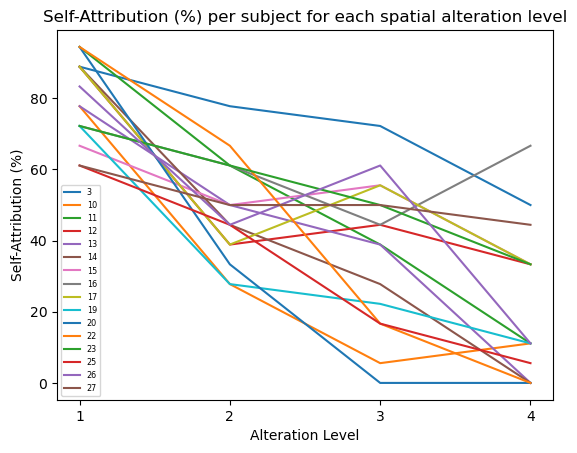

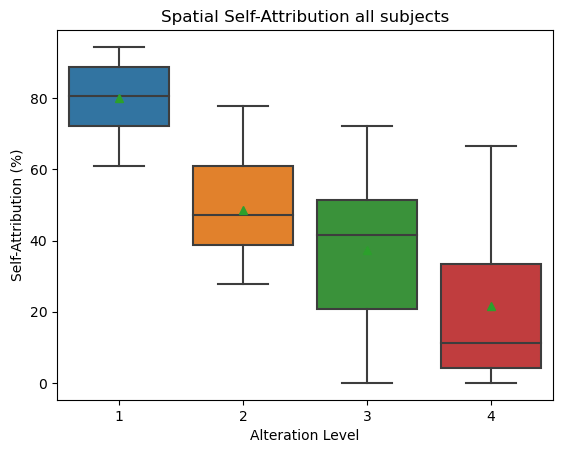

In [3]:
# Spatial alteration only block
# Each subject line plot
print("Spatial-only block, the green triangle in the boxplot stands for the mean")
data.filter(regex=("SpatialBlockL*")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("SpatialBlockL*")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each spatial alteration level")
plt.show()

# All Subjects boxplot
plot = sns.boxplot(data=data.filter(regex=("SpatialBlockL*")), showmeans=True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Spatial Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

Temporal-only block, the green triangle in the boxplot stands for the mean


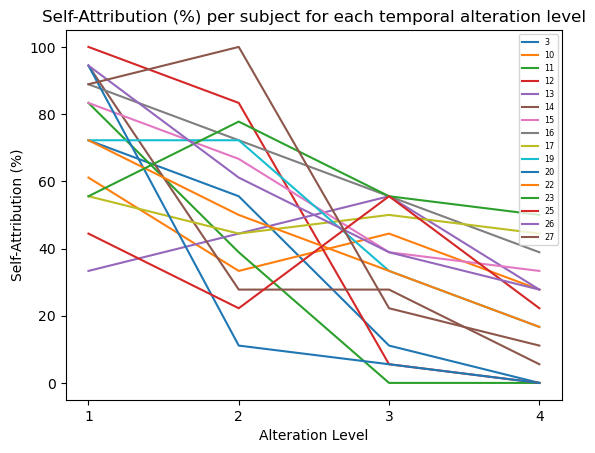

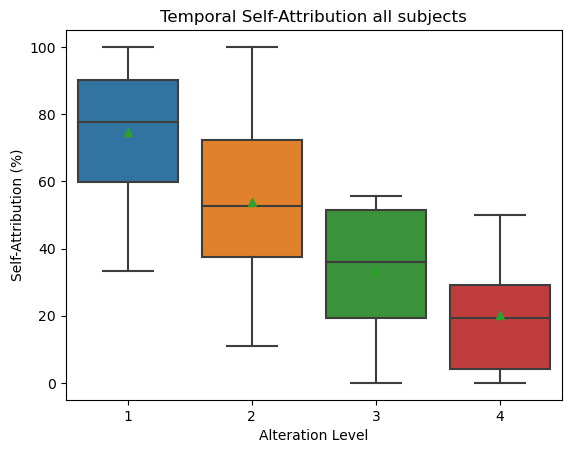

In [4]:
# Temporal alteration only block
# Each subject line plot
print("Temporal-only block, the green triangle in the boxplot stands for the mean")
data.filter(regex=("TemporalBlockL\d+$")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each temporal alteration level")
plt.show()

# All subjects boxplot
plot = sns.boxplot(data=data.filter(regex=("TemporalBlockL\d+$")), showmeans = True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Temporal Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

Combined block heatmap self-attribution per combination (T - Temporal, S - Spatial)


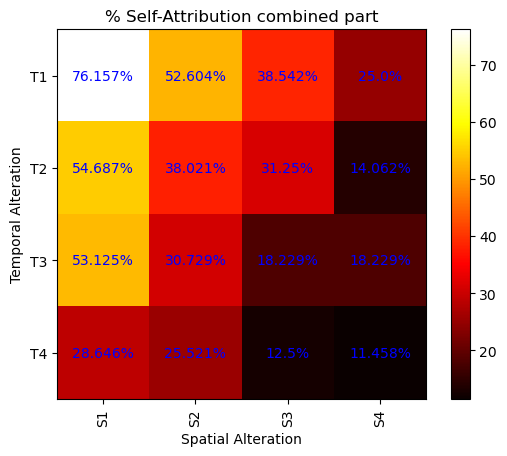

In [5]:
# self attribution across all combined blocks - all subjects
print("Combined block heatmap self-attribution per combination (T - Temporal, S - Spatial)")
combined_data = data.filter(regex=("CombinedBlockT.S."))
combined_data = combined_data.mean(axis=0).to_frame().T
combined_data = combined_data.values.reshape(4, 4)
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + '%',ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.ylabel('Temporal Alteration')
plt.title('% Self-Attribution combined part')
plt.show()

Spatial alteration direction difficulty comparison


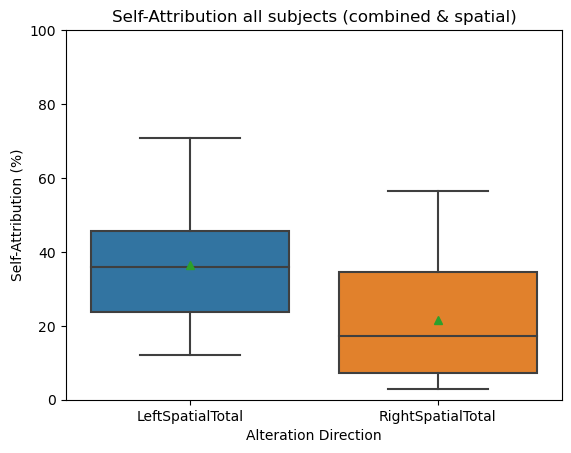

    LeftSpatialTotal  RightSpatialTotal
0             44.444             56.566
1             16.162             26.263
2             25.253             13.131
3             36.364             45.455
4             44.444              4.040
5             32.323              5.051
6             43.434             20.202
7             49.495             35.354
8             59.596             21.212
9             26.263             14.141
10            12.121              3.030
11            17.172              8.081
12            49.495             34.343
13            19.192             13.131
14            35.354             40.404
15            70.707              4.040
Nonparametric wilcoxon test p-value: [0.00918579], Parametric paired t-test p-value: [0.01266245]


In [6]:
# SoA left/right spatial alteration for combined_part + spatial_part
# All subjects boxplot
print("Spatial alteration direction difficulty comparison")
ax = sns.boxplot(data=data.filter(regex=("(?:Left|Right)SpatialTotal")), showmeans=True)
ax.set(xlabel='Alteration Direction', ylabel='Self-Attribution (%)', title = "Self-Attribution all subjects (combined & spatial)")
ax.set_ylim(0,100)
plt.show()

print(data.filter(regex=("(?:Left|Right)SpatialTotal")))

# statistical analysis
left = data.filter(regex=("LeftSpatialTotal$"))
right = data.filter(regex=("RightSpatialTotal$"))
t_statistic_para, p_value_para = stats.ttest_rel(left, right)
wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(left, right)
print("Nonparametric wilcoxon test p-value: " + str(wilcoxon_p_value) + ", Parametric paired t-test p-value: " + str(p_value_para))  

Order effects, first block is counterbalanced


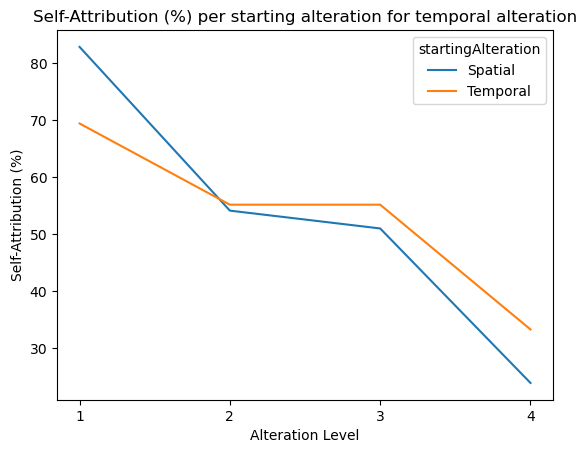

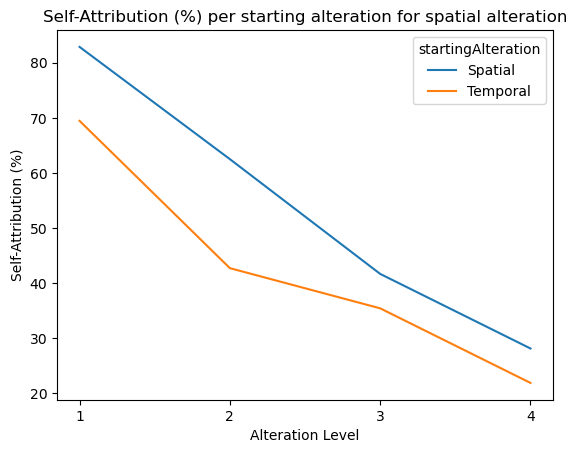

In [7]:
# Understanding the starting alteration effect, looking at the combined block results
print("Order effects, first block is counterbalanced")
grouped_data = data.groupby('startingAlteration').mean()
# Temporal
grouped_data.filter(regex=("CombinedBlockT.S1")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for temporal alteration")
plt.show()

# Spatial
grouped_data.filter(regex=("CombinedBlockT1S.")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("SpatialBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for spatial alteration")
plt.show()

Combined block heatmap response time per combination (T - Temporal, S - Spatial)


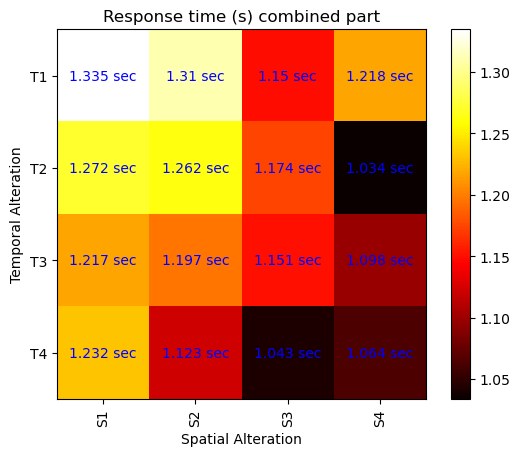

In [8]:
# reaction time heatmap per combination - soon(TM)
print("Combined block heatmap response time per combination (T - Temporal, S - Spatial)")
combined_data = data.filter(regex=("ResponseTimeT.S."))
combined_data = combined_data.mean(axis=0).to_frame().T
combined_data = combined_data.values.reshape(4, 4)
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + " sec",ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.ylabel('Temporal Alteration')
plt.title('Response time (s) combined part')
plt.show()

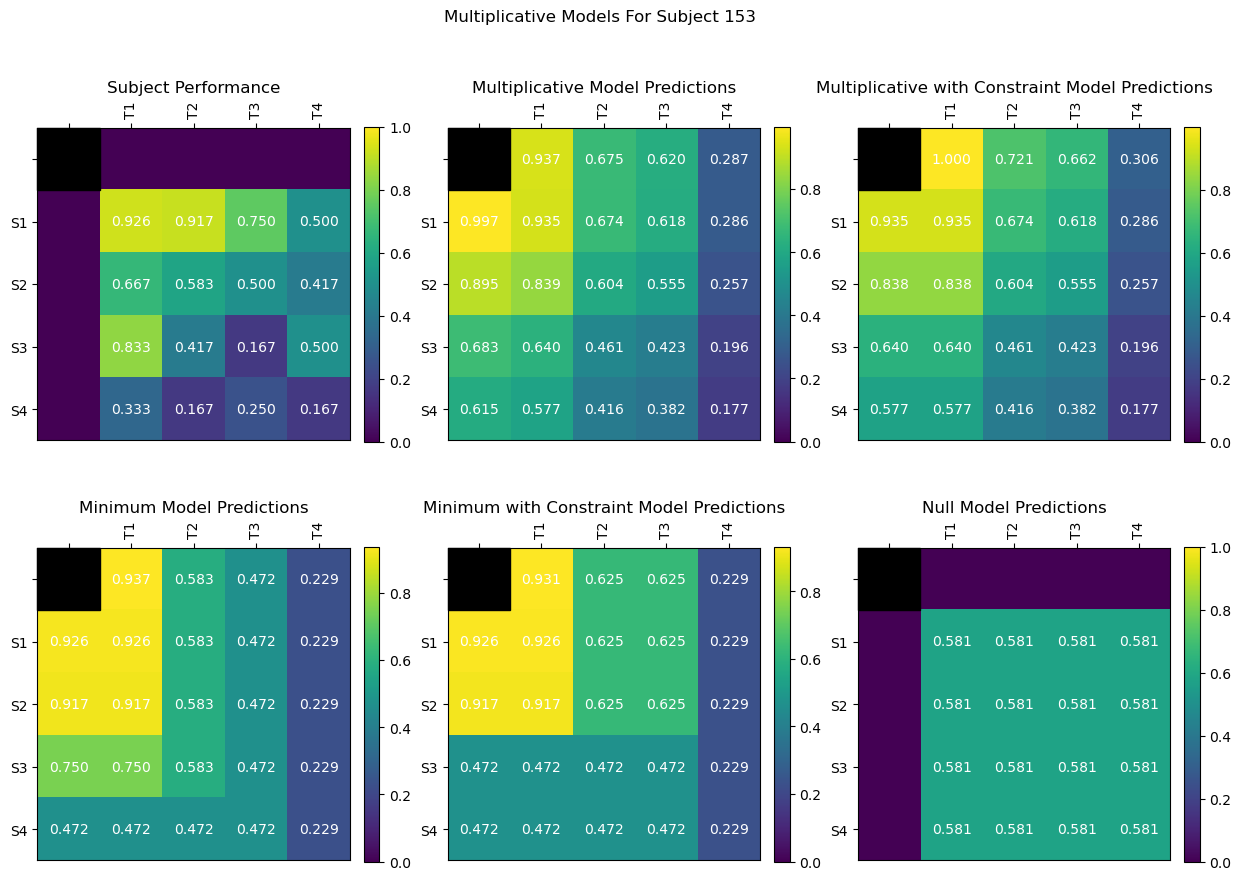

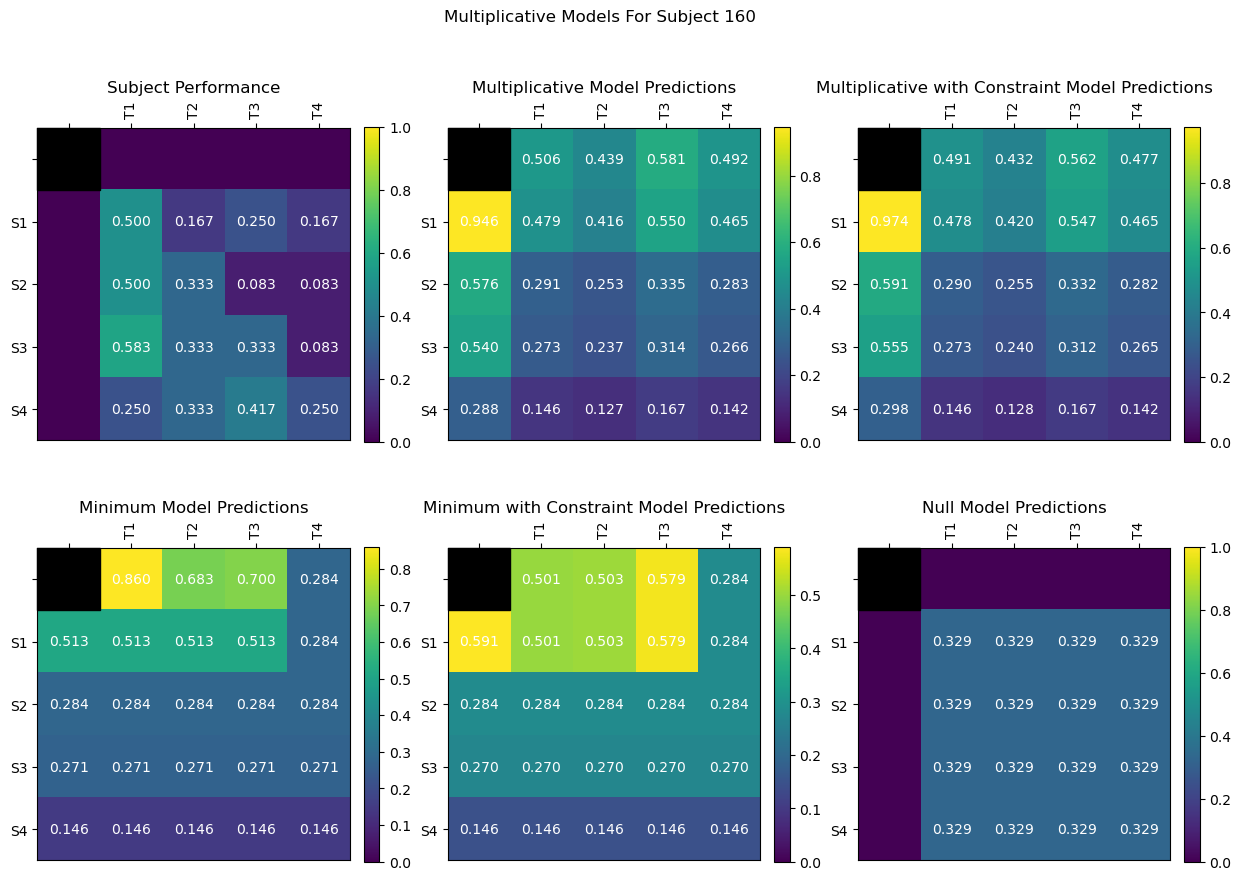

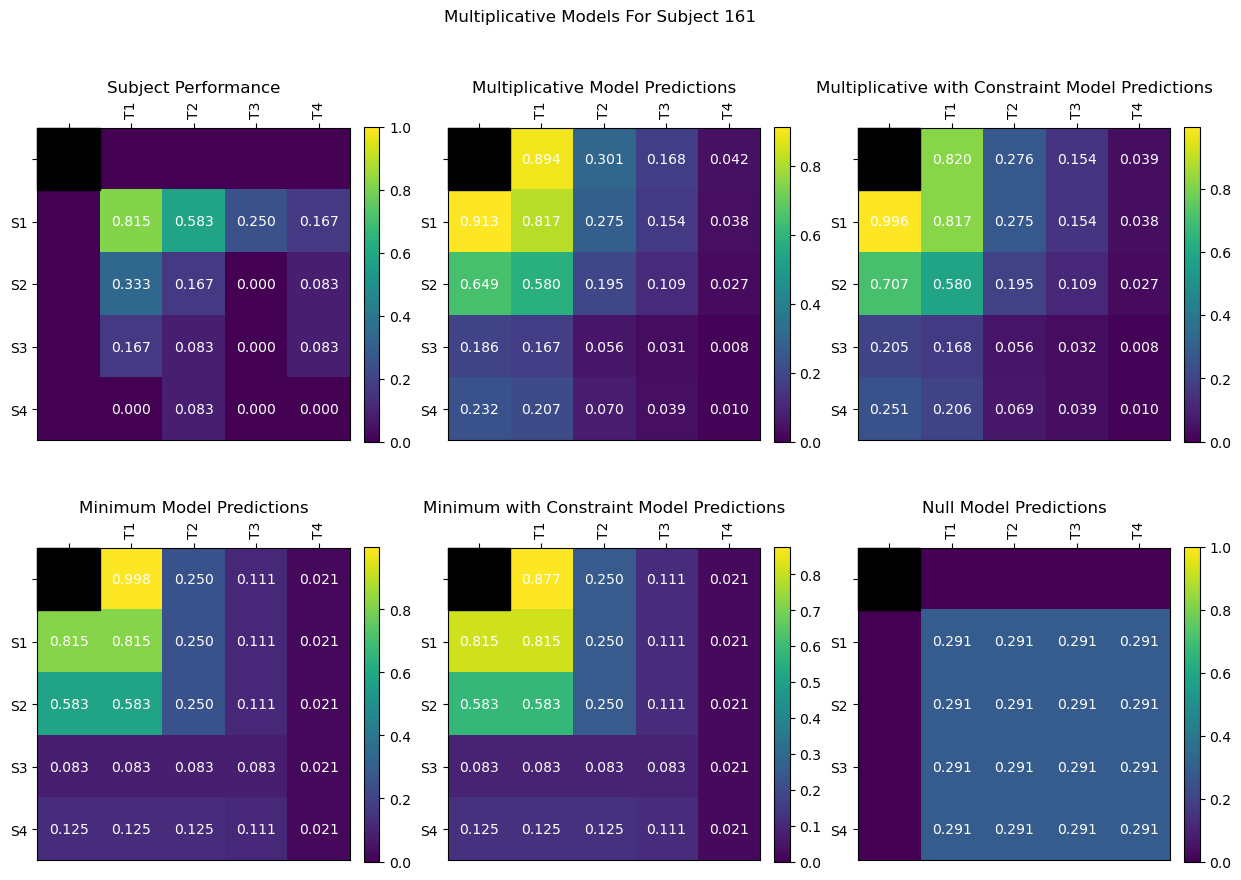

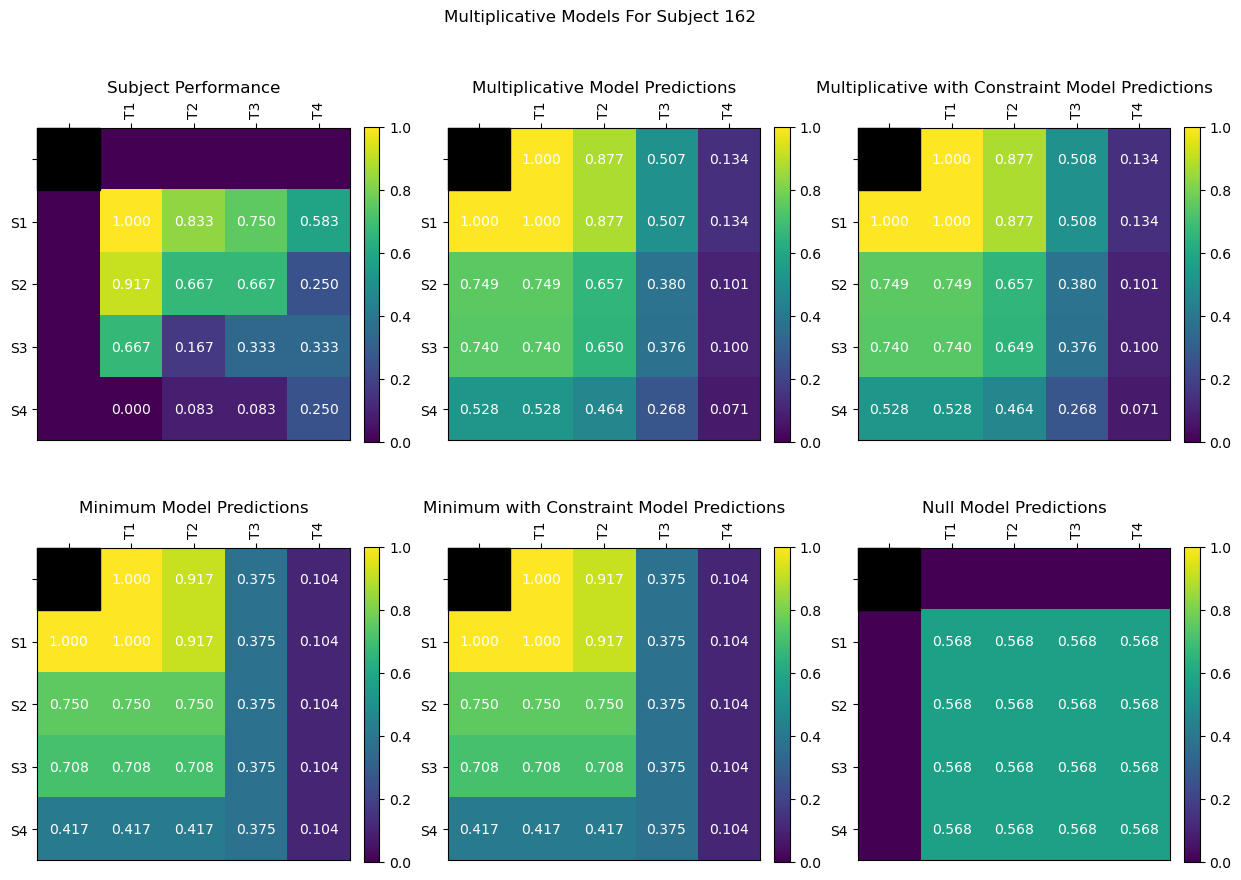

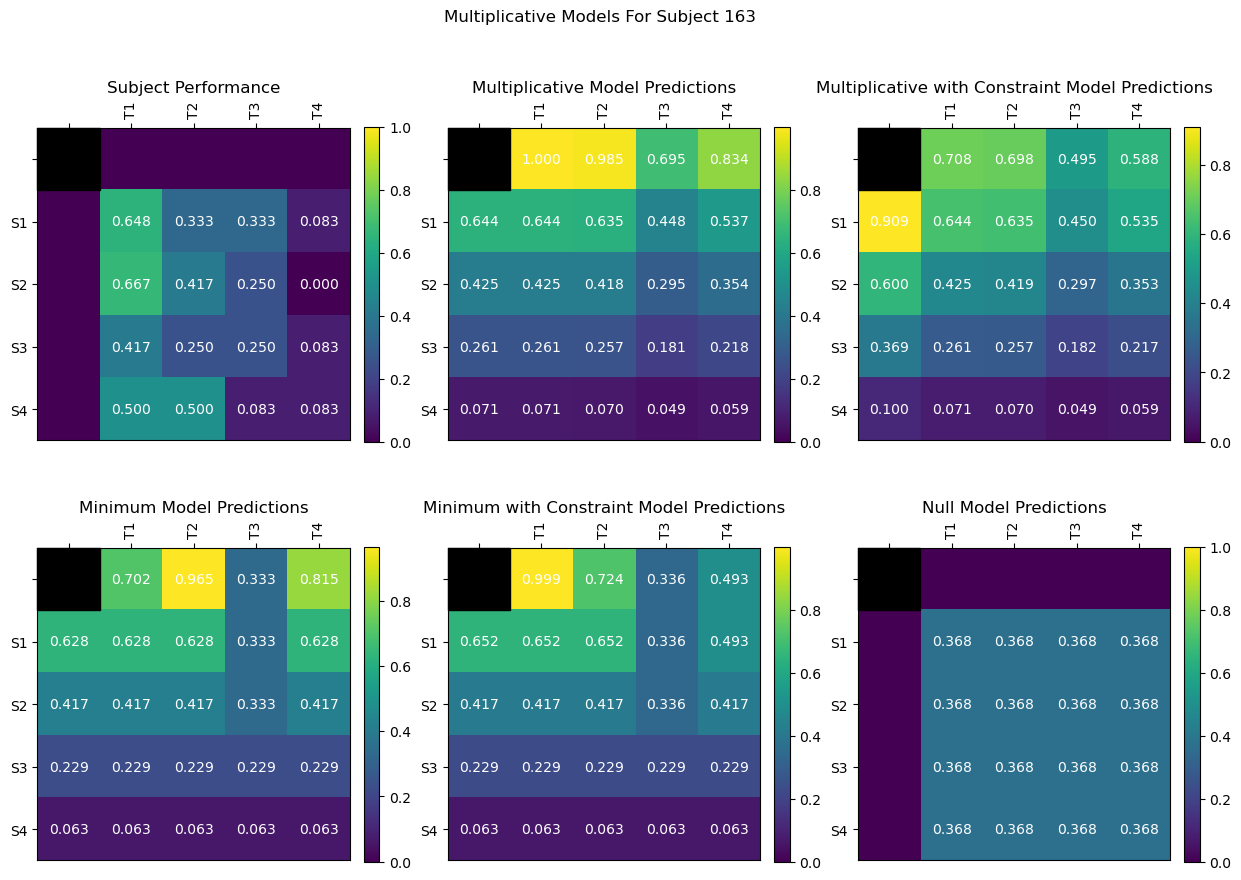

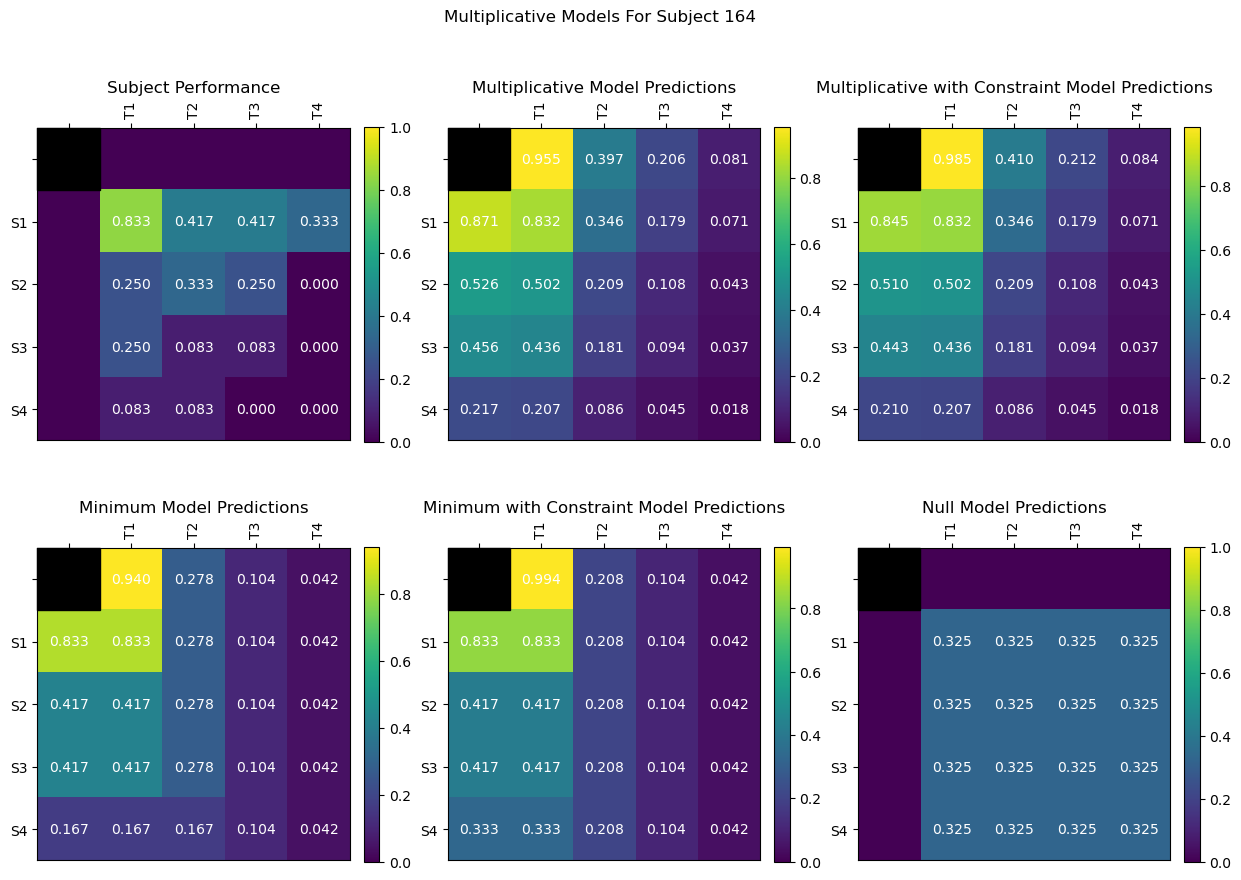

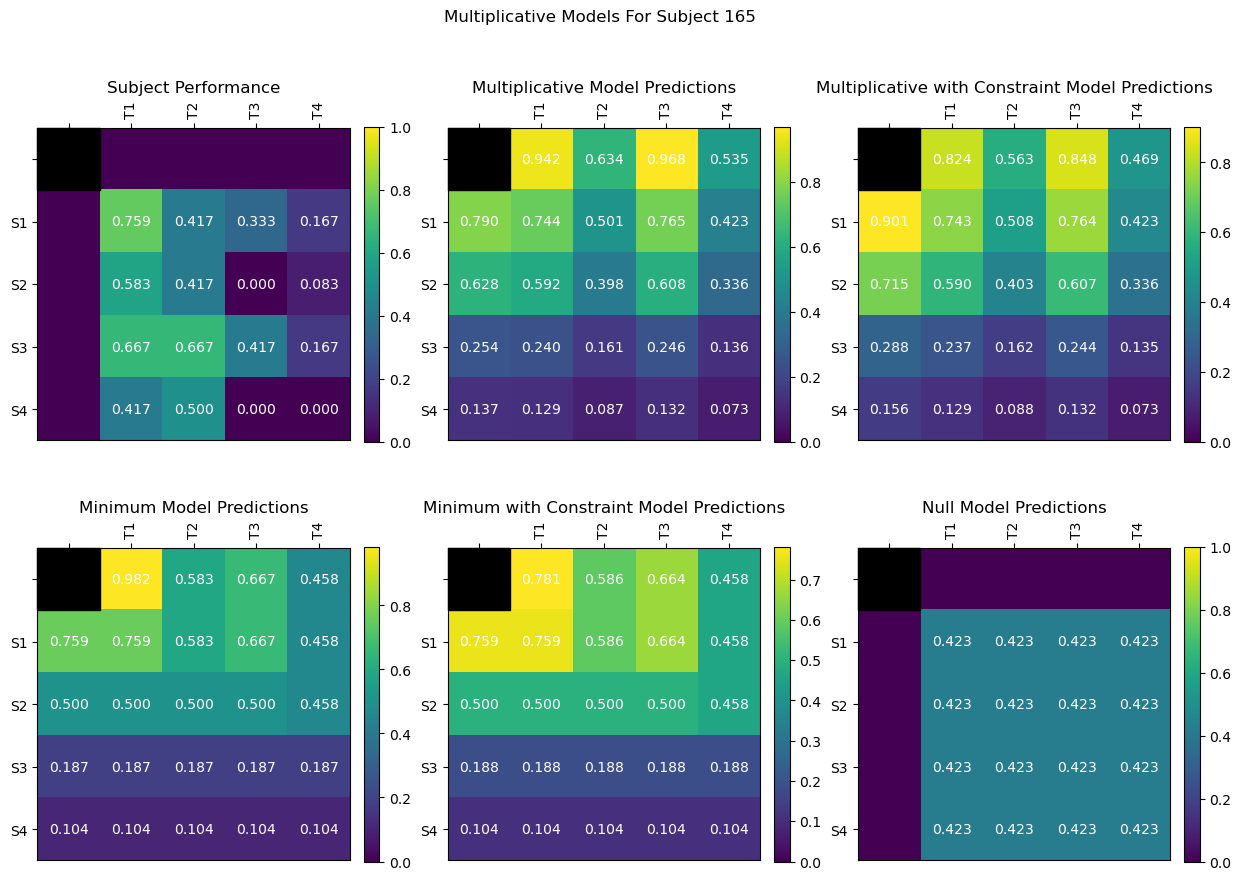

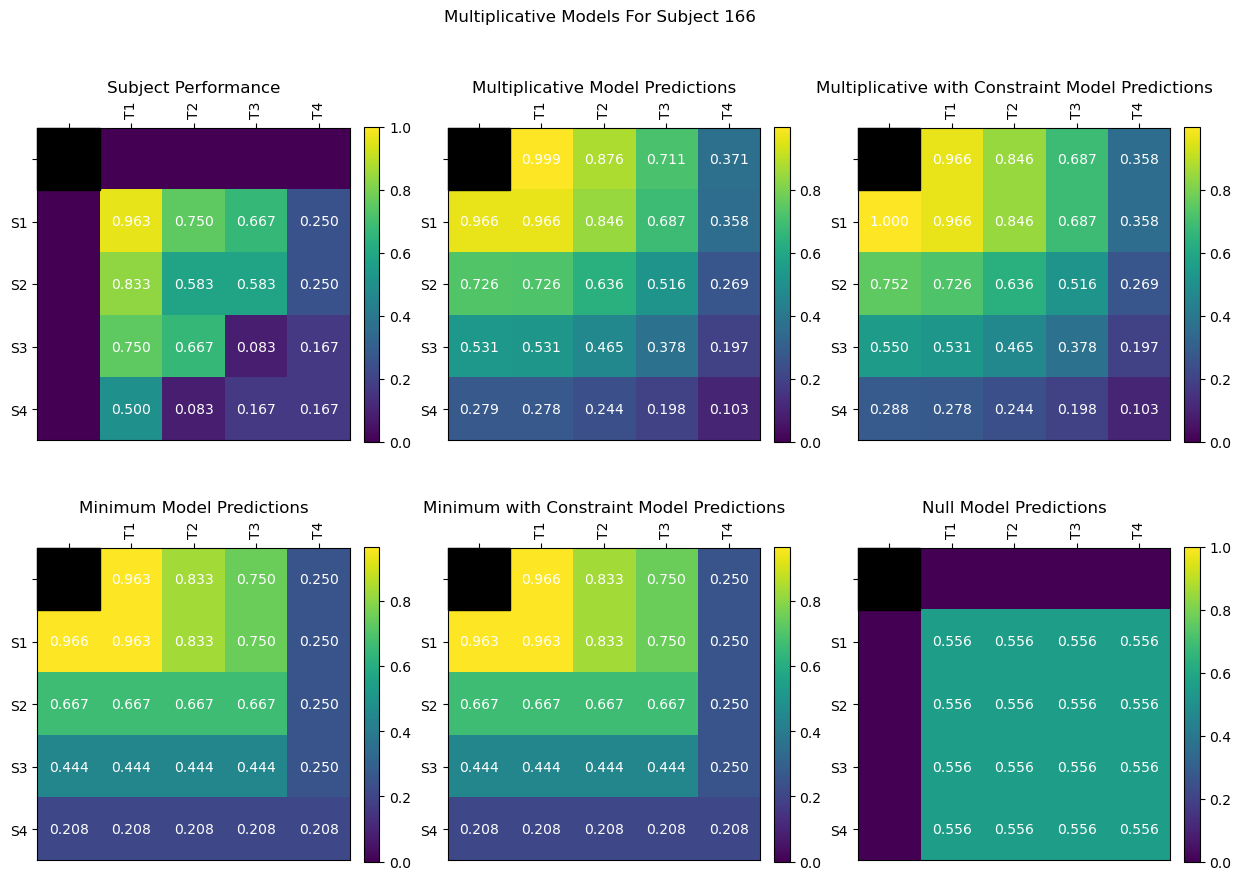

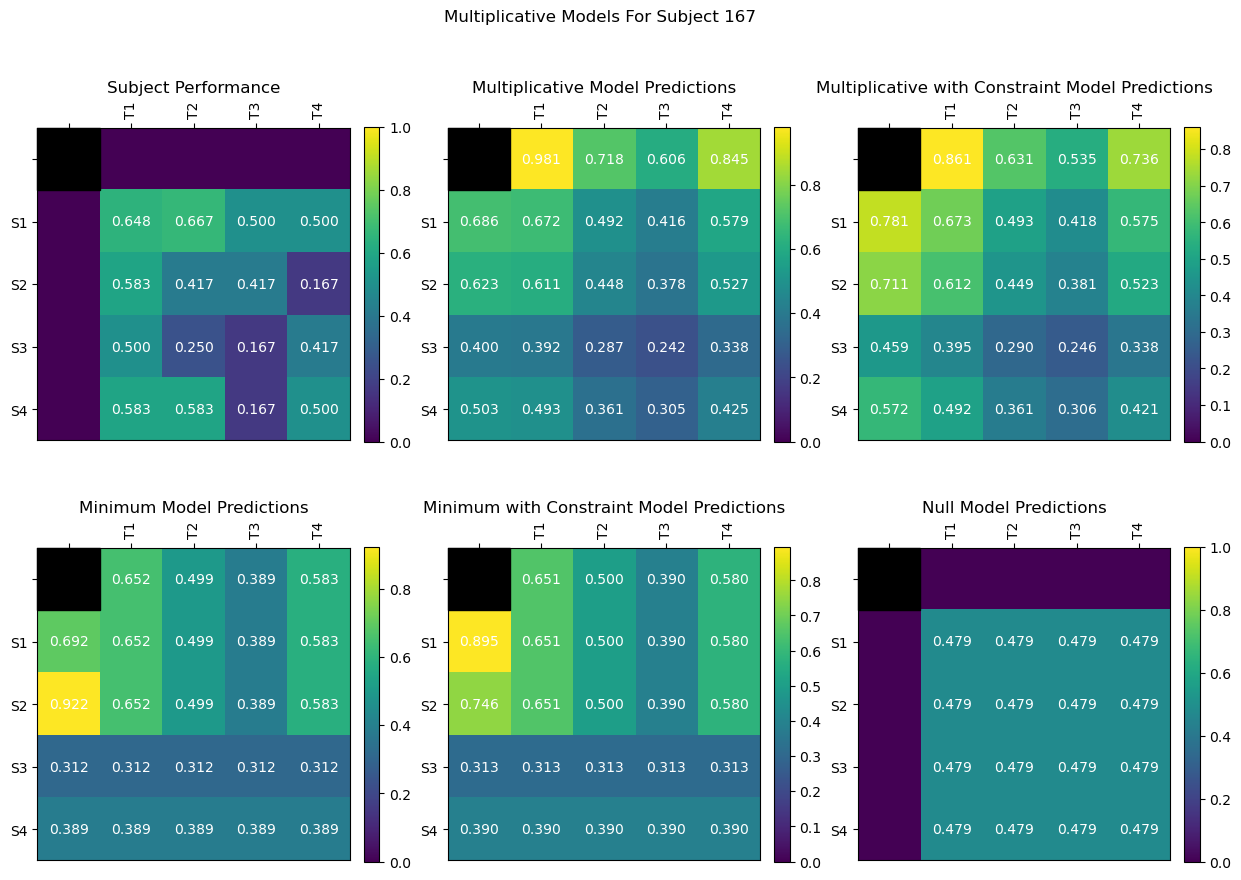

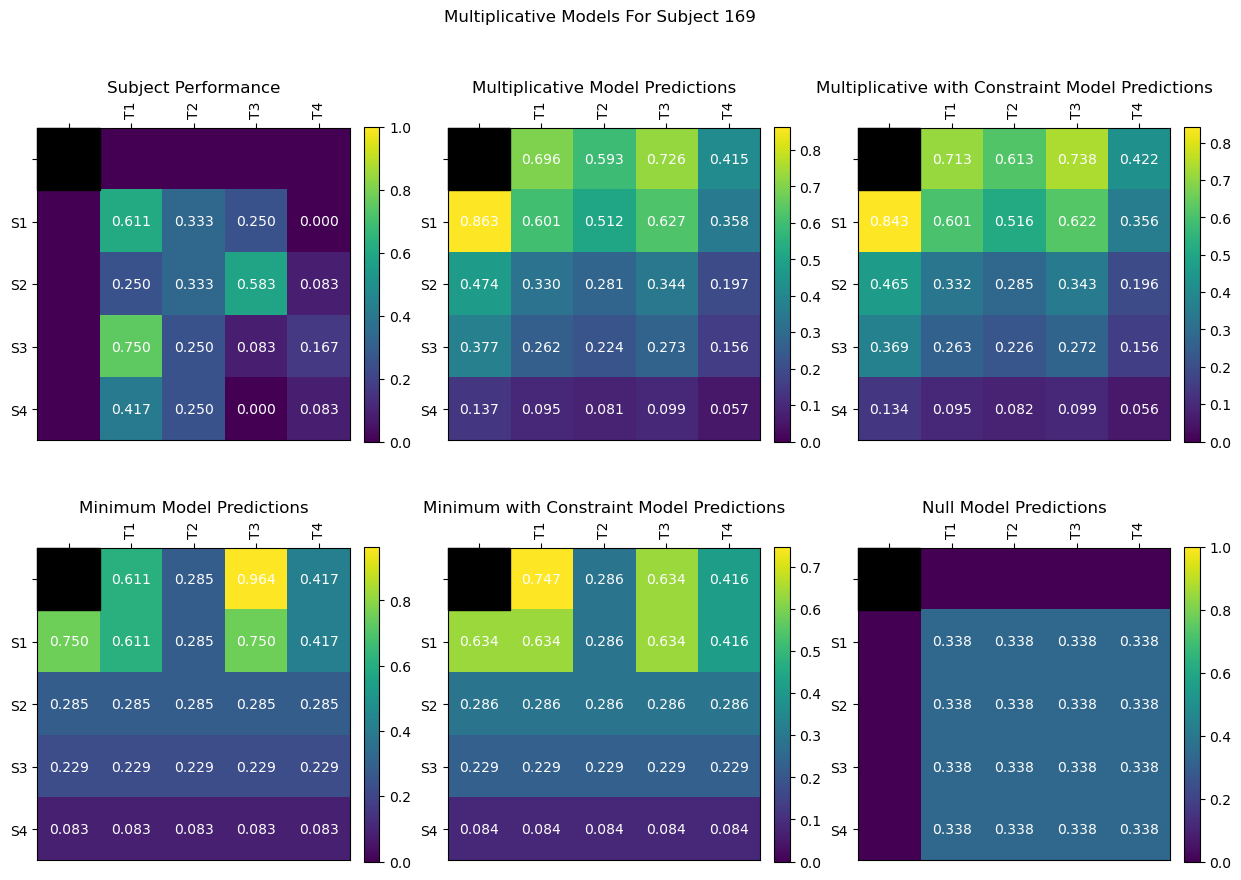

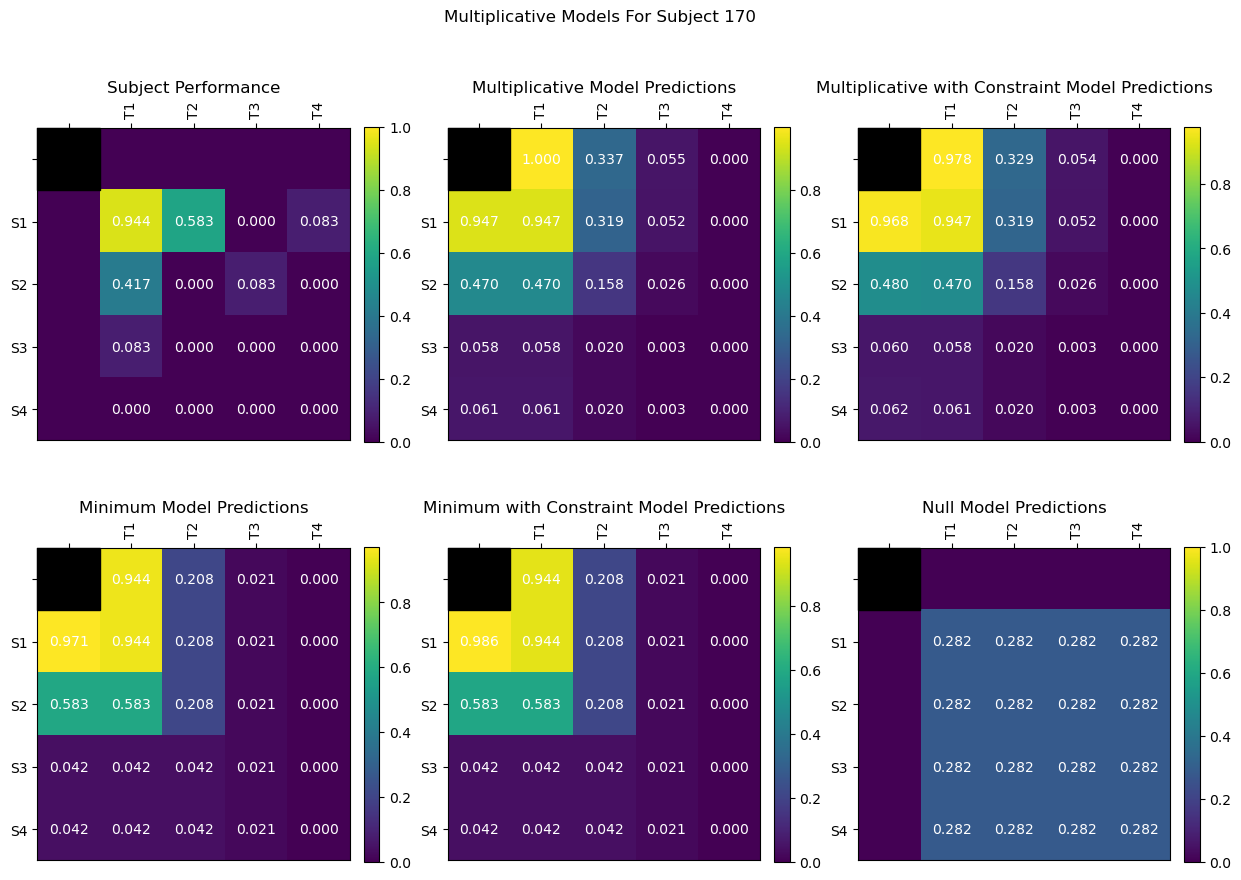

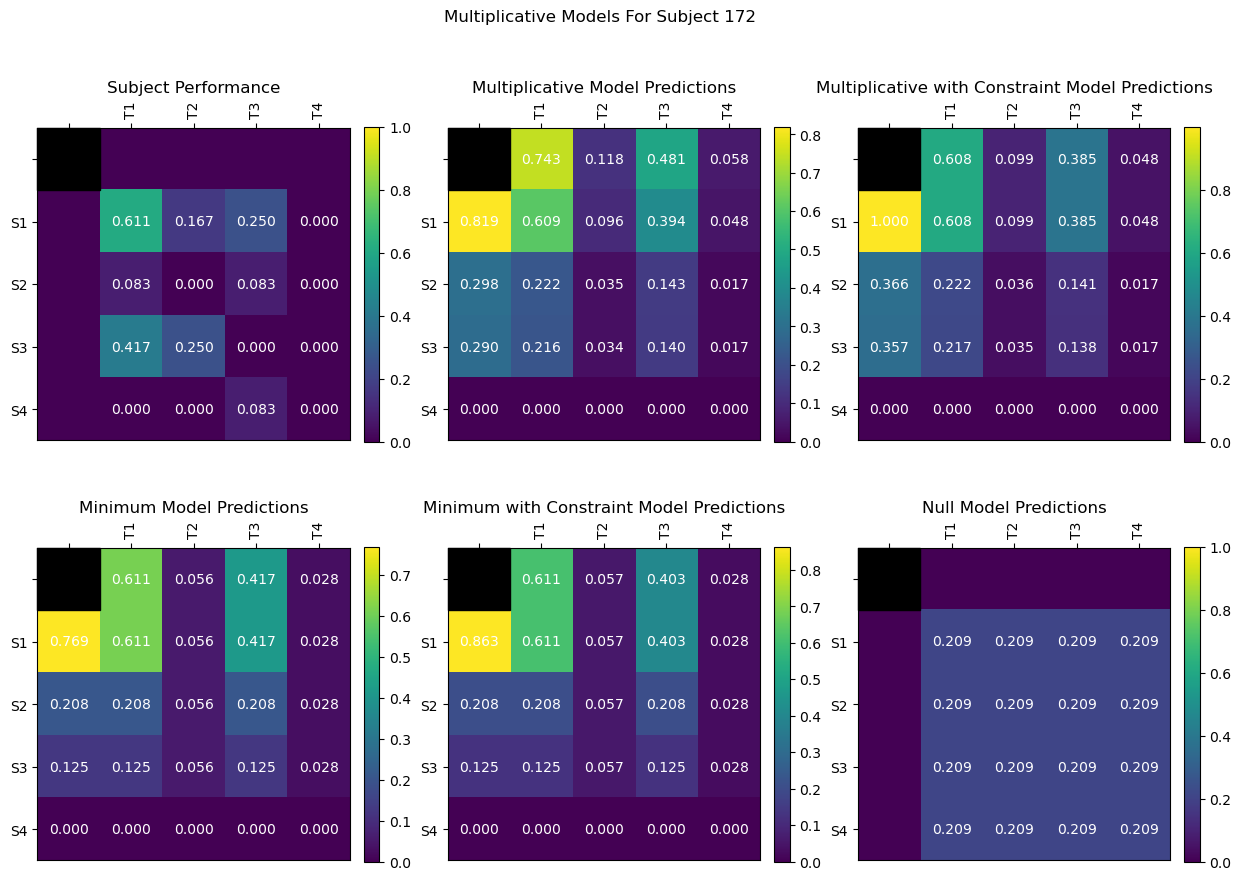

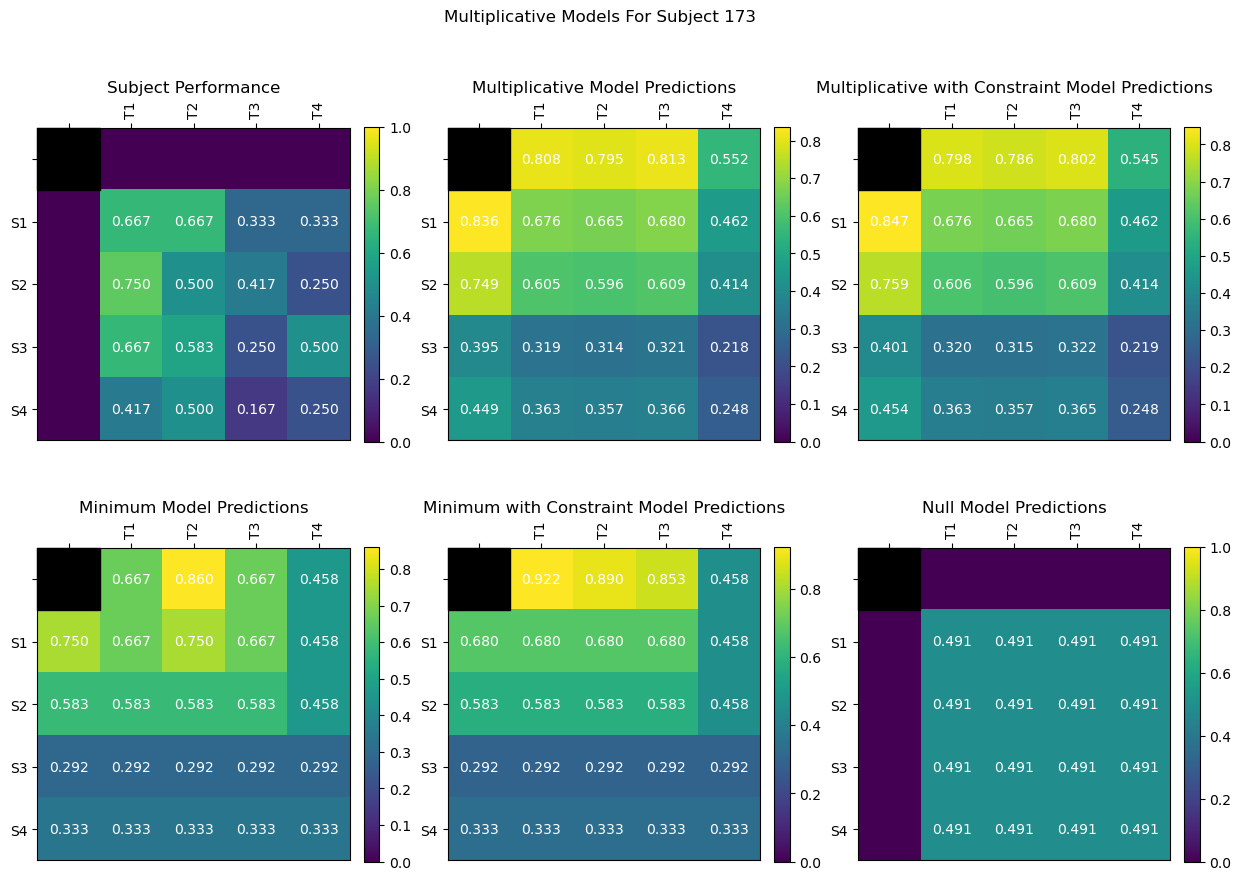

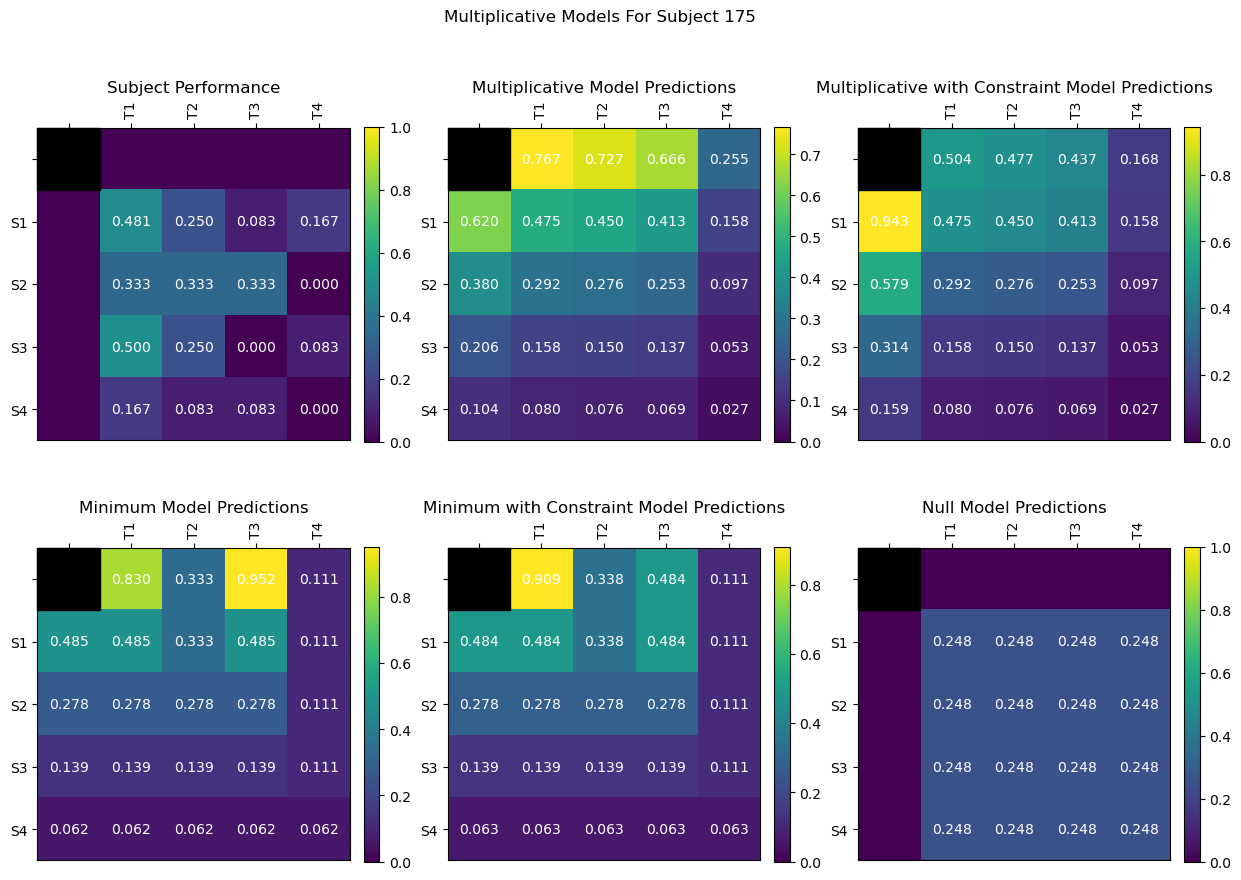

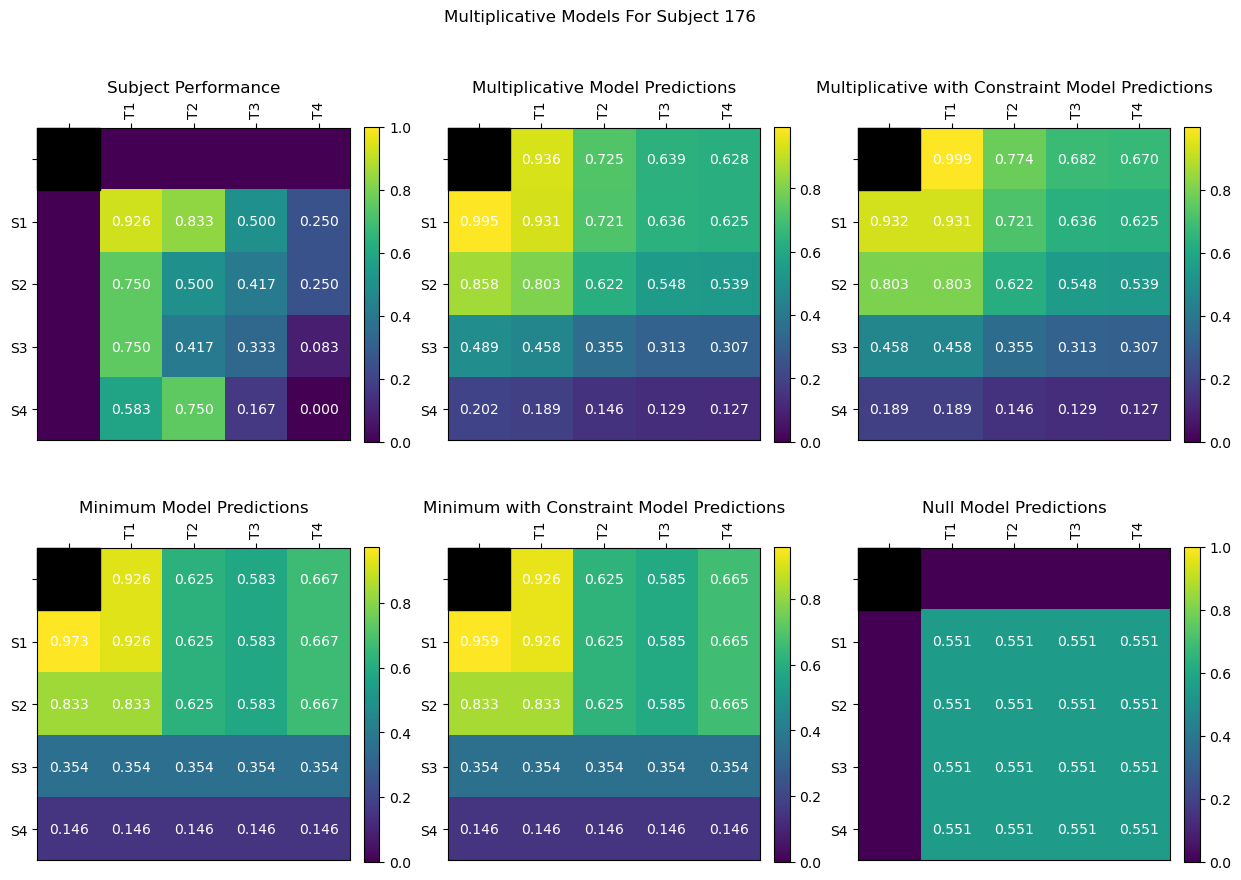

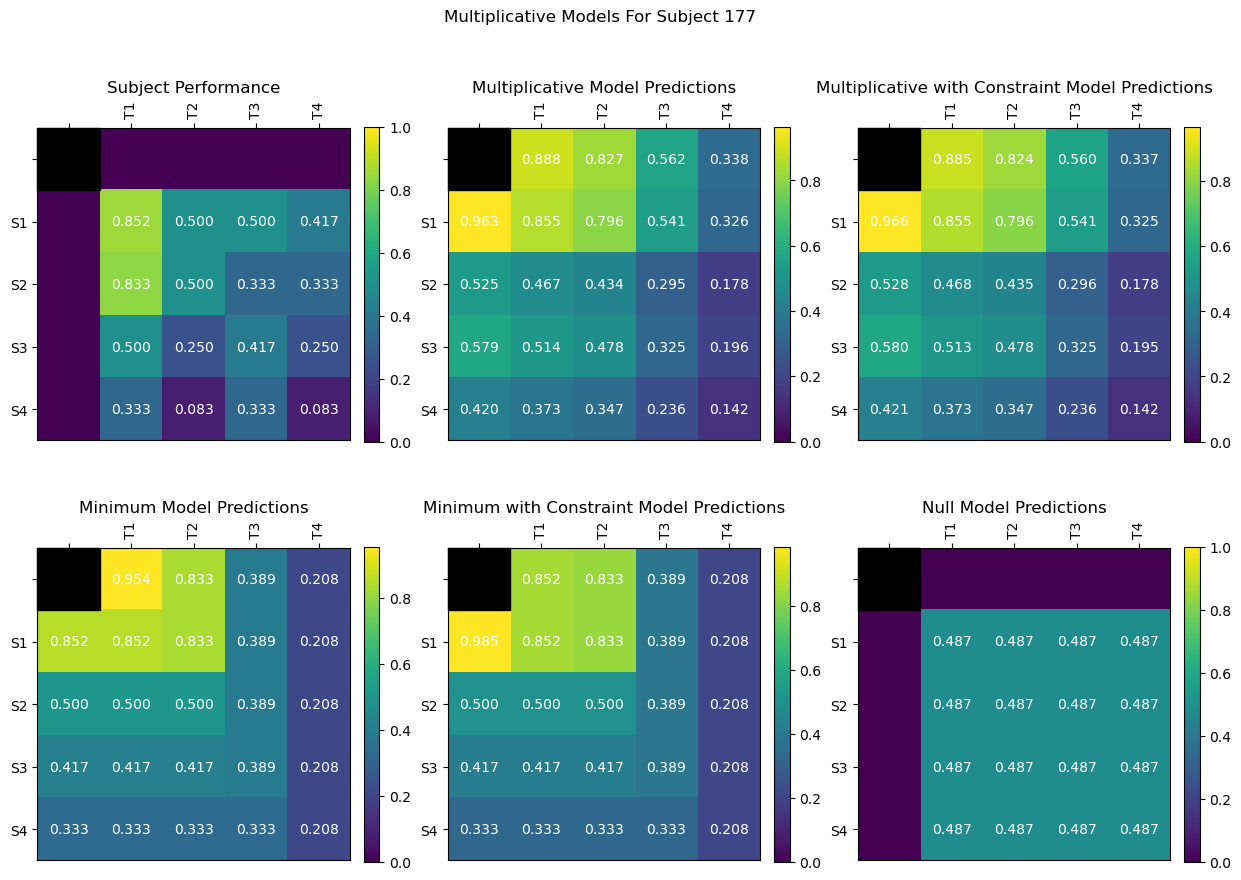

In [81]:
# Multiplicative with constraint model predictions analysis.
# mul_cons_pred is an array with key for each subjects with the model prediction values for:
# temporal1, temporal2, temporal3, temporal4, spatial1, spatial2, spatial3, spatial4.
subjects = [key for key in mul_const_pred if not key.startswith('__')]
for subject in subjects:
    subjectID = subject.split('Sub')[1]
    plt.figure(figsize=(15, 10))
    plt.suptitle('Multiplicative Models For Subject ' + str(subjectID))
    
    # Subject Performance
    plt.subplot(2, 3, 1)
    perf_data = data[data['subjectID'] == int(subjectID)].filter(regex=r'^CombinedBlock', axis=1)
    perf_data_deci = perf_data / 100
    reshaped_data = perf_data_deci.values.reshape(4, 4)
    fivebyfivemat = np.full((5, 5), -1.0)
    fivebyfivemat[1:5, 1:5] = reshaped_data
    
    # Create heatmap with column and index names
    plt.imshow(fivebyfivemat, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1, 5):
        for j in range(1, 5):
            plt.text(j, i, f'{fivebyfivemat[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Subject Performance")
    
    # Multiplicative
    plt.subplot(2, 3, 2)
    temporal_values = mul_pred[subject][0][:4]
    spatial_values = mul_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications of domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1] * spatial_values[i - 1]

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Multiplicative Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Multiplicative with Constraint.
    plt.subplot(2, 3, 3)
    temporal_values = mul_const_pred[subject][0][:4]
    spatial_values = mul_const_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications of domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = temporal_values[j - 1] * spatial_values[i - 1]

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Multiplicative with Constraint Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Minimum model
    
    plt.subplot(2, 3, 4)
    temporal_values = min_pred[subject][0][:4]
    spatial_values = min_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications of domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = min(temporal_values[j - 1], spatial_values[i - 1])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Minimum Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Minimum With Constraint model
    plt.subplot(2, 3, 5)
    temporal_values = min_const_pred[subject][0][:4]
    spatial_values = min_const_pred[subject][0][4:8]

    matrix = np.zeros((5, 5))
    matrix[0, 1:5] = temporal_values # outer row
    matrix[1:5, 0] = spatial_values # outer col

    # Fill in the 4x4 inner matrix with multiplications of domains
    for i in range(1, 5):
        for j in range(1, 5):
            matrix[i, j] = min(temporal_values[j - 1], spatial_values[i - 1])

    # Plot the matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("Minimum with Constraint Model Predictions")
    for i in range(5):
        for j in range(5):
            if (i == 0) & (j == 0):
                continue
            else:
                plt.text(j, i, f'{matrix[i, j]:.3f}', ha='center', va='center', color='w')
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    
    # Null model
    
    plt.subplot(2, 3, 6)
    meananswers = null_pred[subject][0][0]
    fivebyfivemat = np.full((5, 5), -1.0)
    fivebyfivemat[1:5, 1:5] = meananswers
    
    # Create heatmap with column and index names
    plt.imshow(fivebyfivemat, cmap='viridis', vmin=0, vmax=1)
    plt.xticks(range(5), ['', 'T1', 'T2', 'T3', 'T4'] , rotation=90)
    plt.yticks(range(5), ['', 'S1', 'S2', 'S3', 'S4'])
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, facecolor='black', edgecolor='black', fill=True, clip_on=False))
    plt.colorbar(fraction=0.046, pad=0.04)
    for i in range(1, 5):
        for j in range(1, 5):
            plt.text(j, i, f'{fivebyfivemat[i, j]:.3f}', ha='center', va='center', color='w')
    
    plt.title("Null Model Predictions")
    

    plt.show()

In [82]:
def calculate_aic(nll, k):
    """
    Calculate the Akaike Information Criterion (AIC) for a model.
    Parameters:
    - nll: The negative log-likelihood of the model.
    - k: The number of parameters in the model.
    Returns:
    - AIC value.
    """
    return 2 * k + 2 * nll

def calculate_bic(nll, k, n):
    """
    Calculate the Bayesian Information Criterion (BIC) for a model.
    Parameters:
    - nll: The negative log-likelihood of the model.
    - k: The number of parameters in the model.
    - n: The number of data points.
    Returns:
    - BIC value.
    """
    return k * np.log(n) + 2 * nll

def delta_ic(nll_1, nll_2, k1, k2, n):
    """
    Calculate the delta between the information criterions.
    Parameters:
    - nll_1: The negative log-likelihood of the first model.
    - nll_2: The negative log-likelihood of the second model.
    - k1: The number of parameters in the first model.
    - k2: The number of parameters in the second model.
    - n: The number of data points.
    Returns:
    - deltaAIC value.
    - deltaBIC value.
    """
    deltaAIC = calculate_aic(nll_1, k1) - calculate_aic(nll_2, k2)
    deltaBIC = calculate_bic(nll_1, k1, n) - calculate_bic(nll_2, k2, n)
    return deltaAIC, deltaBIC

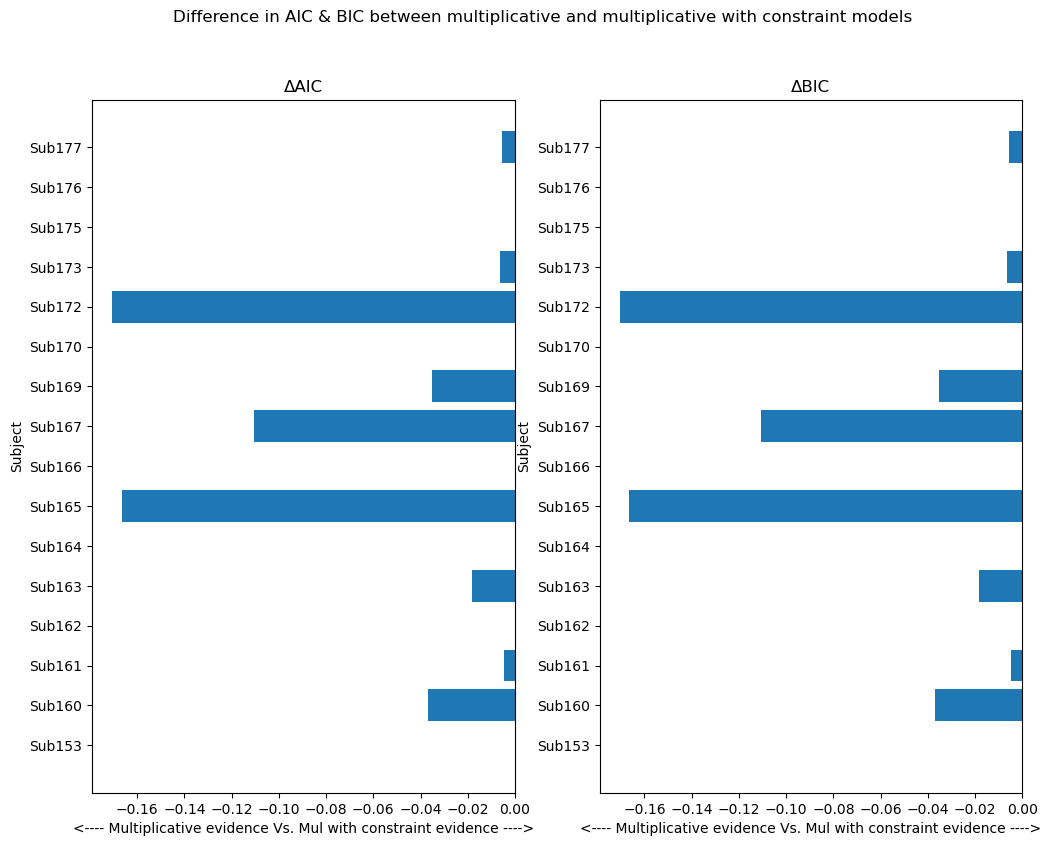

In [83]:
# Difference in AIC & BIC between multiplicative and multiplicative with constraint models.
k = 8 # number of parameters.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in mul_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k, k, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and multiplicative with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Mul with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Mul with constraint evidence ---->")

plt.show()

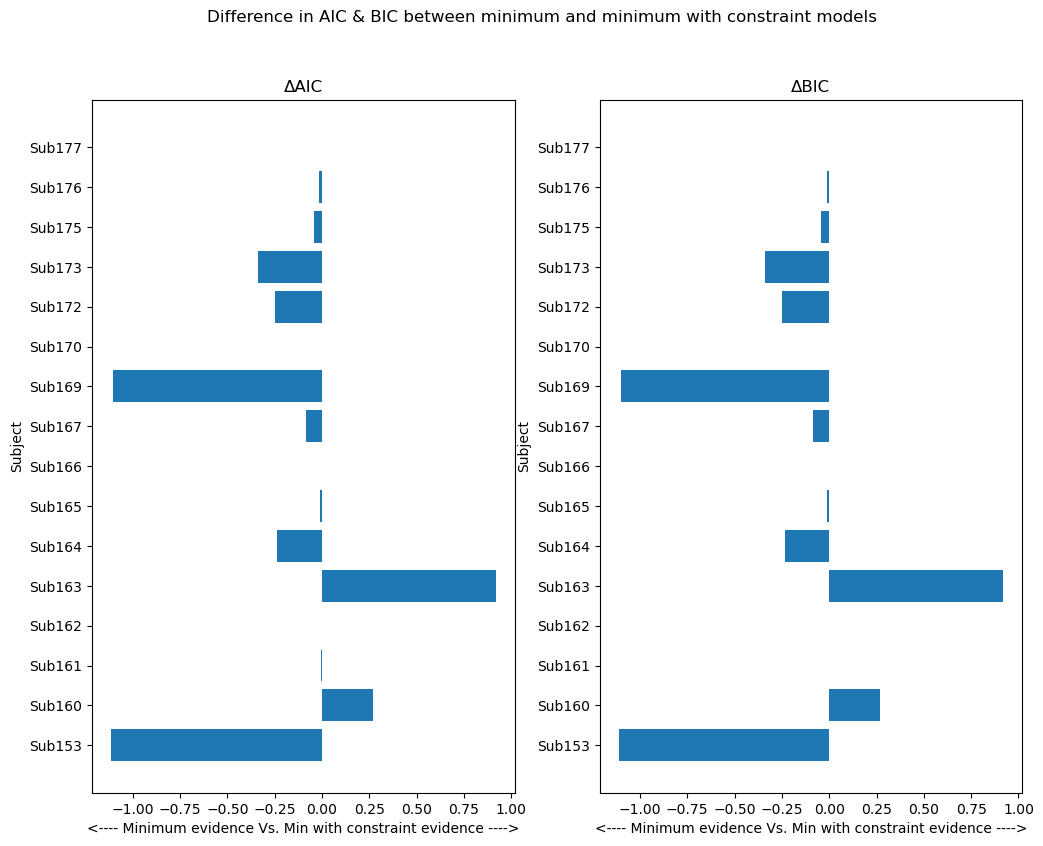

In [84]:
# Difference in AIC & BIC between minimum and minimum with constraint models.
k = 8 # number of parameters.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = min_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = min_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k, k, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between minimum and minimum with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Minimum evidence Vs. Min with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Minimum evidence Vs. Min with constraint evidence ---->")

plt.show()

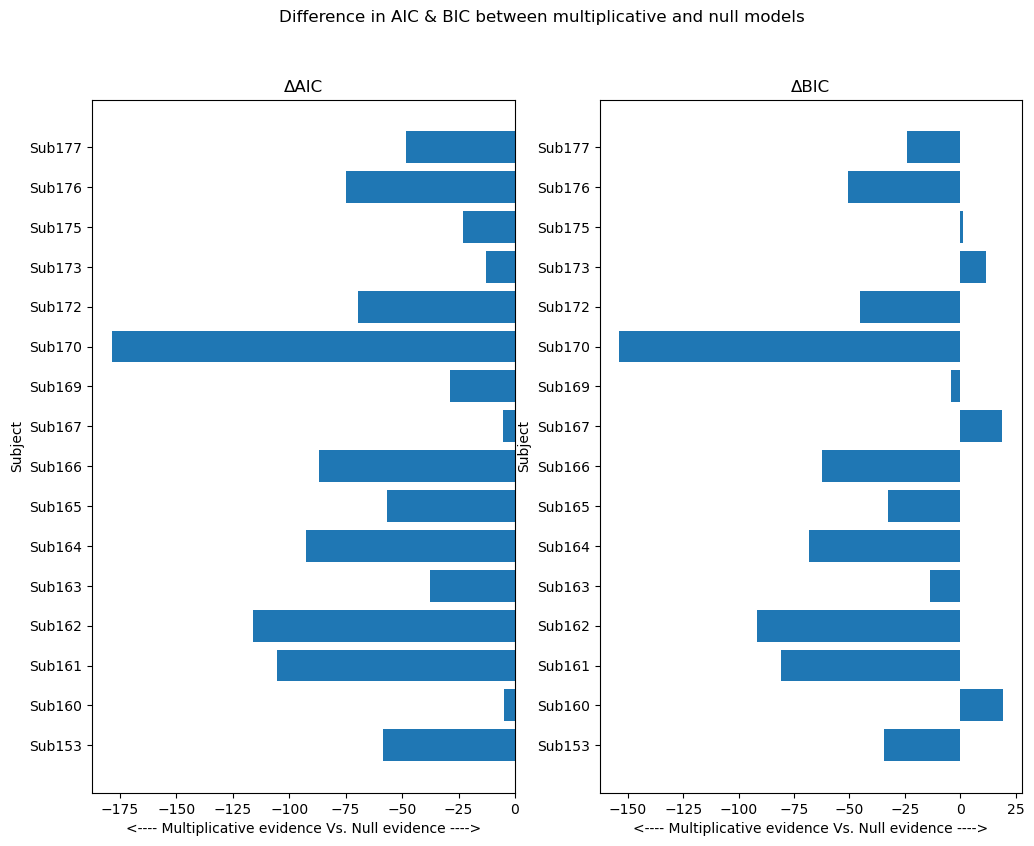

In [92]:
# Difference in AIC & BIC between multiplicative and null models.
k_mul = 8 # number of parameters for the multiplicative model.
k_null = 1 # number of parameters for the null model.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = null_pred[key][0][1] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_mul, k_null, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and null models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Null evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Null evidence ---->")

plt.show()

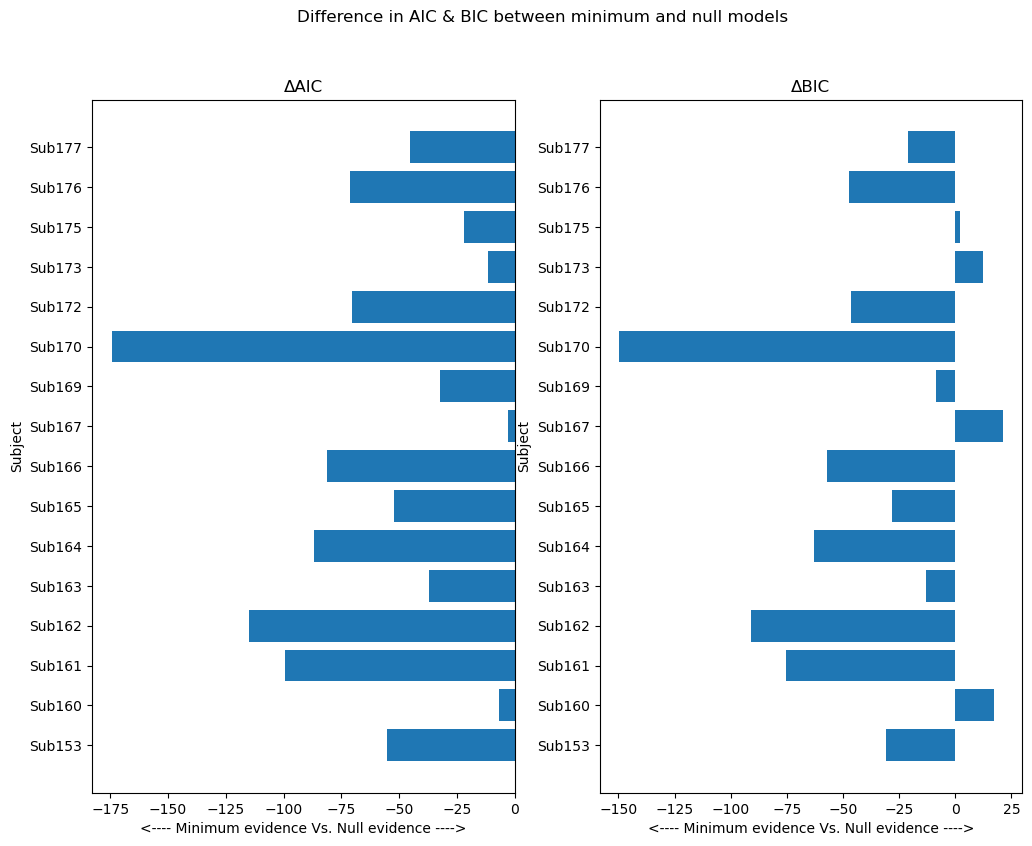

In [86]:
# Difference in AIC & BIC between minimum and null models.
k_min = 8 # number of parameters for the minimum model.
k_null = 1 # number of parameter for the null model.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = min_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = null_pred[key][0][1] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k_min, k_null, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between minimum and null models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Minimum evidence Vs. Null evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Minimum evidence Vs. Null evidence ---->")

plt.show()

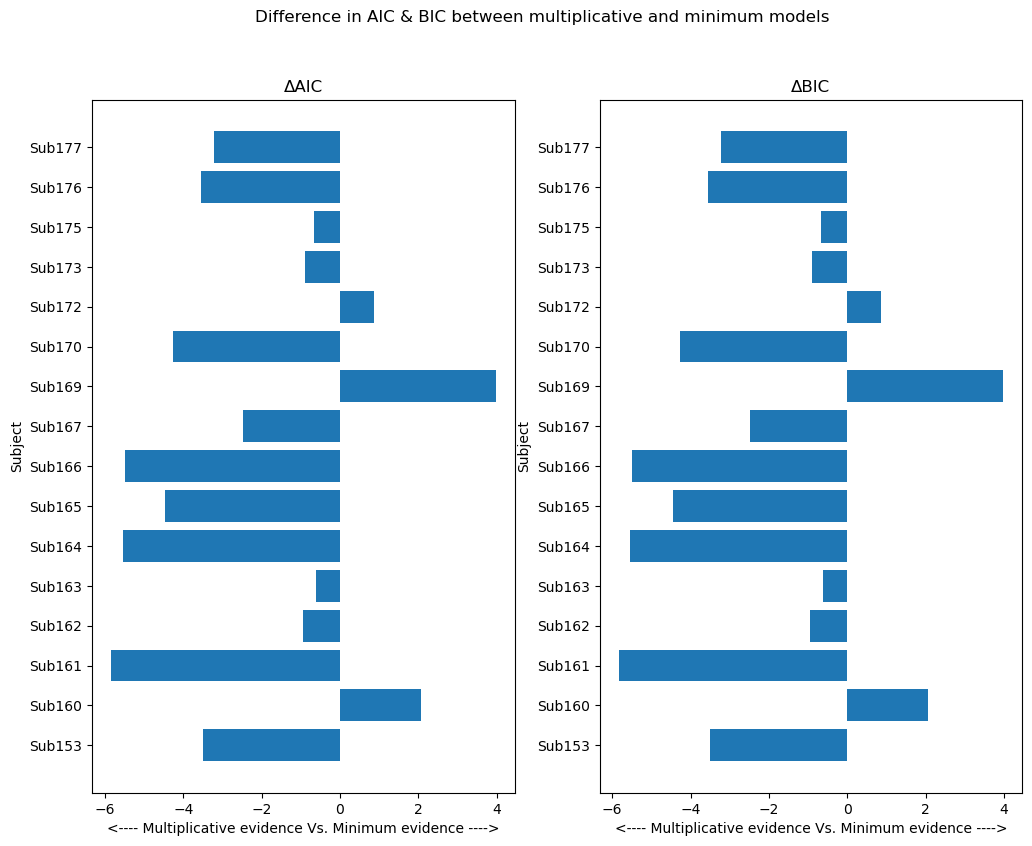

In [87]:
# Difference in AIC & BIC between multiplicative and minimum models.
k = 8 # number of parameters.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = min_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k, k, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative and minimum models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Minimum evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Multiplicative evidence Vs. Minimum evidence ---->")

plt.show()

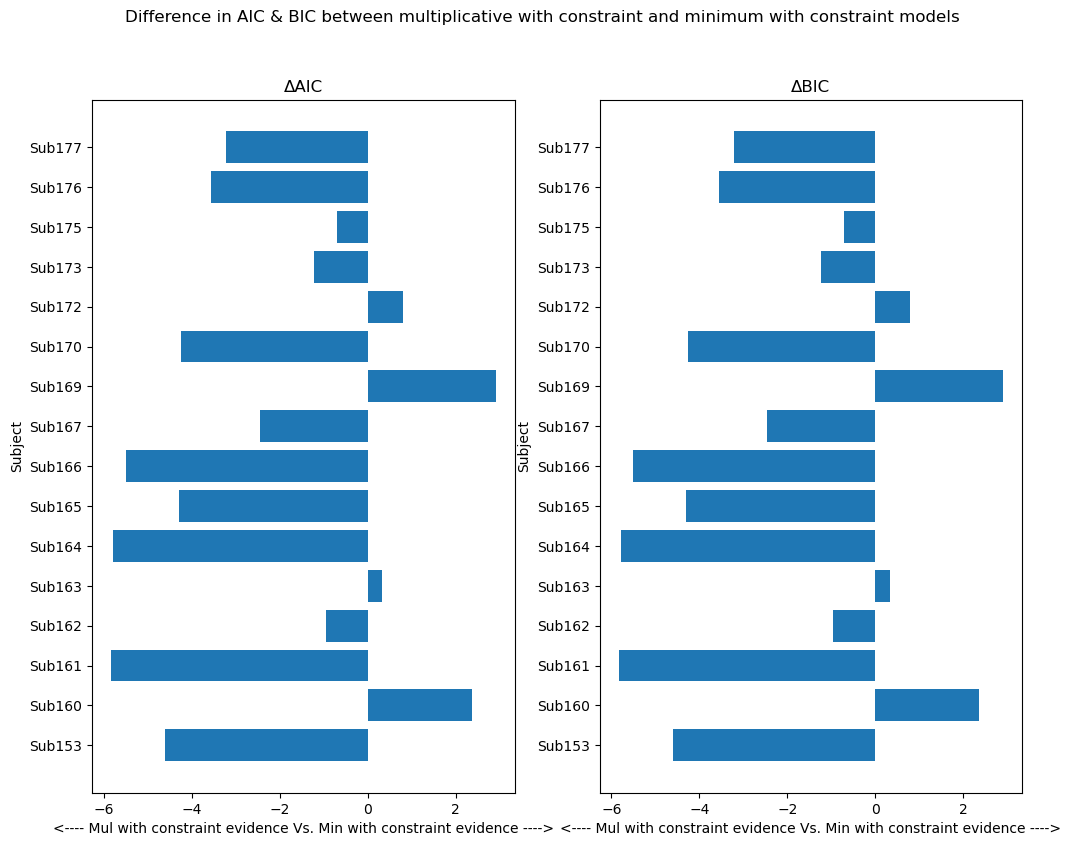

In [90]:
# Difference in AIC & BIC between multiplicative with constraint and minimum with constraint models.
k = 8 # number of parameters.
n = 234 # number of data points.
subjectList = []
deltaAICList = []
deltaBICList = []

for key in min_pred.keys():
    if key.startswith("Sub"):
        nll_1 = mul_const_pred[key][0][8] # negative log likelihood of the multiplicative model.
        nll_2 = min_const_pred[key][0][8] # negative log likelihood of the multiplicative with constraint model.
        deltaAIC, deltaBIC = delta_ic(nll_1, nll_2, k, k, n)
        subjectList.append(key)
        deltaAICList.append(deltaAIC)
        deltaBICList.append(deltaBIC)

plt.figure(figsize=(12, 9))
plt.suptitle('Difference in AIC & BIC between multiplicative with constraint and minimum with constraint models')        

plt.subplot(1, 2, 1)
plt.barh(subjectList, deltaAICList)
plt.title("ΔAIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Min with constraint evidence ---->")

plt.subplot(1, 2, 2)
plt.barh(subjectList, deltaBICList)
plt.title("ΔBIC")
plt.ylabel("Subject")
plt.xlabel("<---- Mul with constraint evidence Vs. Min with constraint evidence ---->")

plt.show()